# Importing thenecessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Data collection

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Gold price prediction/gold_price_data.csv')

In [3]:
#to see the data in the 5 row of the dataset
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
#shape of the dataset
df.shape

(2290, 6)

In [5]:
#necessary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
#check for any null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
#getting the statistical measure of the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
#correlation between the datapoints
correlation = df.corr()

<AxesSubplot:>

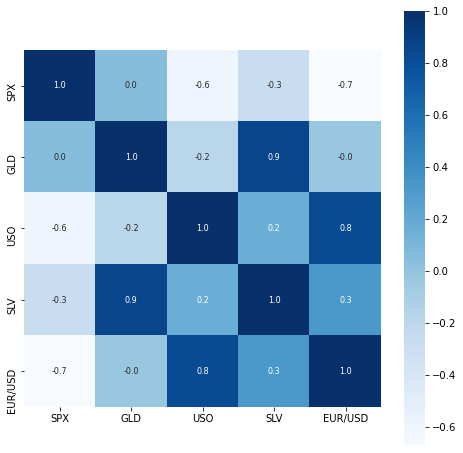

In [9]:
#constructing a heatmap to understand the correlatin
plt.figure(figsize = (8, 8))

sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap ='Blues')

In [10]:
#correlation values of GLD
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

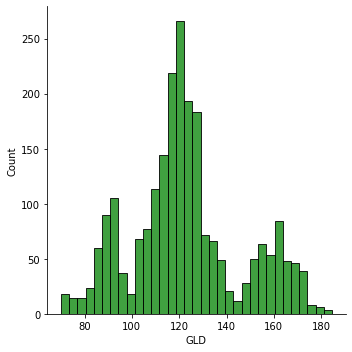

In [11]:
#checking the distribution of gold value
sns.displot(df['GLD'], color = 'green')

splitting the features and label

In [12]:
X = df.drop(columns = ['Date', 'GLD'], axis =1)
Y = df['GLD']

In [13]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [14]:
print(X.shape, Y.shape)

(2290, 4) (2290,)


# Splitting the dataset into training and testing data for model evaluation

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 2)

model training :

Random forest regressor

In [16]:
model = RandomForestRegressor(n_estimators = 100)

In [17]:
model.fit(x_train, y_train)

RandomForestRegressor()

model evaluation

In [18]:
#model evaluation on training data 
training_pred = model.predict(x_train)

# R squared error
error_score = metrics.r2_score(training_pred, y_train)

print('THE TRAINING ERROR IS :', error_score)

THE TRAINING ERROR IS : 0.998435833002207


In [19]:
#model evaluation on testing data 
testing_pred = model.predict(x_test)

# R squared error
error_score = metrics.r2_score(testing_pred, y_test)

print('THE TRAINING ERROR IS :', error_score)

THE TRAINING ERROR IS : 0.9891902638457826


In [20]:
#compare the actual price and predicted price of test data
y_test = list(y_test)

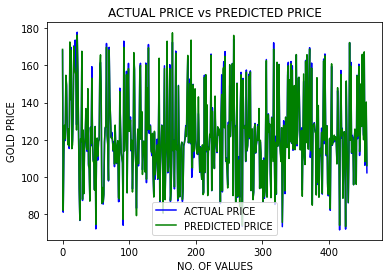

In [21]:
plt.plot(y_test, color = 'blue', label = 'ACTUAL PRICE')
plt.plot(testing_pred, color = 'green', label = 'PREDICTED PRICE')
plt.xlabel('NO. OF VALUES')
plt.ylabel('GOLD PRICE')
plt.title('ACTUAL PRICE vs PREDICTED PRICE')
plt.legend()
plt.show()